In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 

In [2]:
import h5py
snapshots_file = './snapshots/snapshots'

s = 1
with h5py.File(f'{snapshots_file}_s{s}.h5', "r") as f:
    print(f["tasks"].keys())
    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    psi2 = f["tasks/psi2"][:]   # read full psi1 data
    q1 = f["tasks/q1"][:]   # read full psi1 data
    q2 = f["tasks/q2"][:]   # read full psi1 data
    u1 = f["tasks/u1"][:]   # read full psi1 data
    u2 = f["tasks/u2"][:]   # read full psi1 data
    # gradq1 = f["tasks/gradq1"][:]
    # gradq2 = f["tasks/gradq2"][:]
    tau1 = f["tasks/tau_psi1"][:]   # read full psi1 data
    tau2 = f["tasks/tau_psi2"][:]   # read full psi1 data
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))
    print(psi1.shape)


<KeysViewHDF5 ['psi1', 'psi2', 'q1', 'q2', 'tau_psi1', 'tau_psi2', 'u1', 'u2']>
(200, 144, 64)


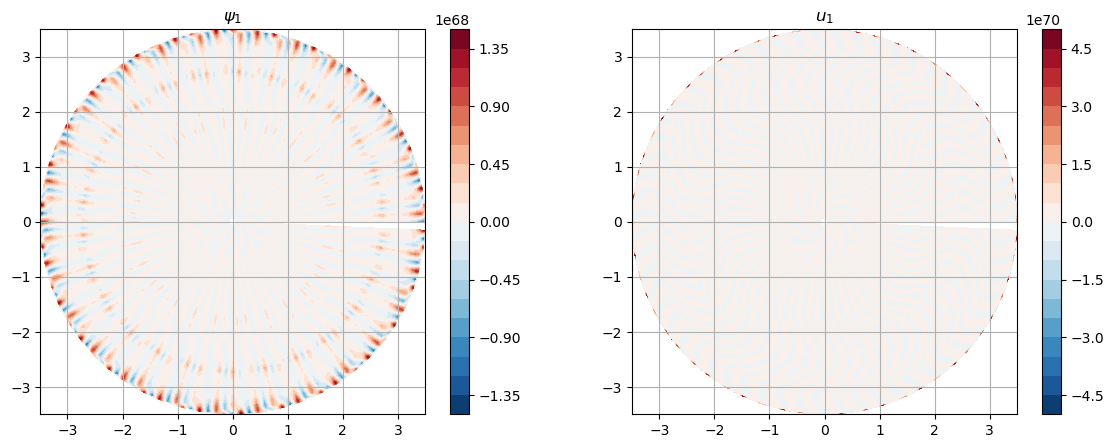

In [3]:
st = -1

prob_class = 'IVP'
r0 = 0
rt = None 

F = 51.8
x = r[:,r0:rt] * np.cos(phi)
y = r[:,r0:rt] * np.sin(phi)
q1t = psi1[st,:,r0:rt]
q2t = u1[st,0,:,r0:rt]
# q1t = q1[st,:,r0:rt]
# q2t = gradq1[st,1,:,r0:rt]


fig, ax = plt.subplots(1,2, figsize=(14,5))

im = ax[0].contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax[0].set_aspect('equal')           # force square aspect
ax[0].set_adjustable('box')         # let the box resize
ax[0].set_title(r'$\psi_1$')
ax[0].grid()
plt.colorbar(im)

im = ax[1].contourf(x,y, q2t, levels=21, cmap='RdBu_r')
ax[1].set_aspect('equal')           # force square aspect
ax[1].set_adjustable('box')         # let the box resize
ax[1].set_title(r'$u_1$')
ax[1].grid()
plt.colorbar(im)

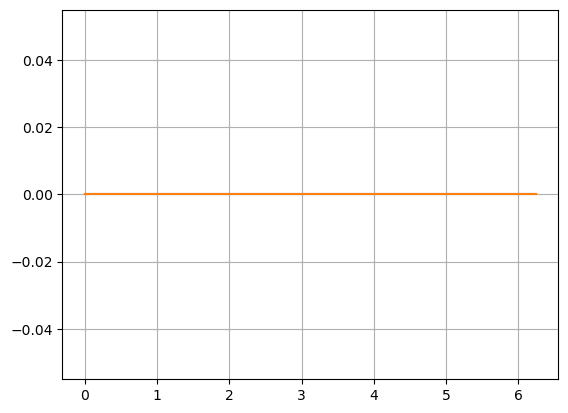

In [11]:
plt.plot(phi[:,0].flatten(),u1[1,0,:,-1])
plt.plot(phi[:,0].flatten(),u1[1,0,:,-10])
plt.grid()

In [8]:
# find phi1max 
phi_max = np.argmax(np.abs(psi1[0,:,r0:rt]).squeeze(), axis=0)[0]
phi_max 

110

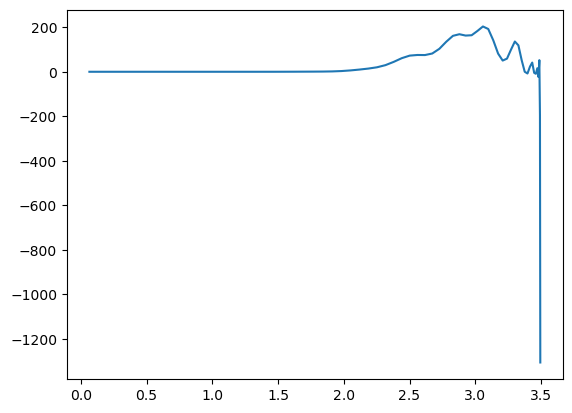

In [9]:
st = 40
plt.plot(r[0,r0:rt].flatten(),q1[st,phi_max,r0:rt])

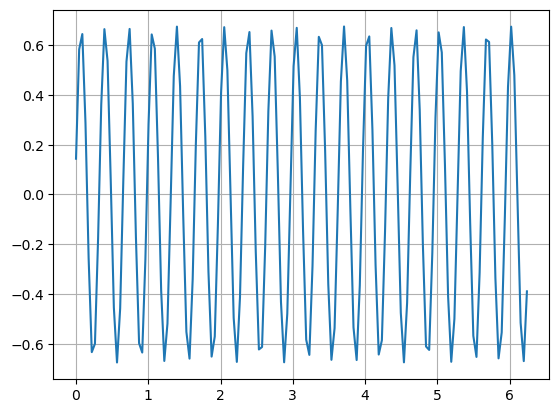

In [11]:
plt.plot(phi[:,0].flatten(),psi1[0,:,-10])
plt.grid()
# plt.plot(phi[:,-1].flatten(),-q1[0,:,-1]/np.max(np.abs(q1[0,phi_max,r0:rt])), 'x')

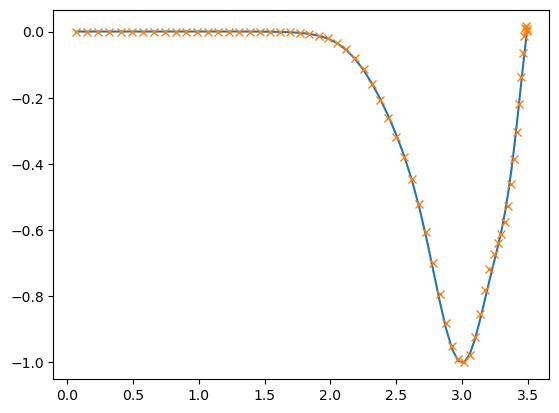

In [35]:
st = 5
plt.plot(r[0,r0:rt].flatten(),psi1[st,phi_max,r0:rt]/np.max(np.abs(psi1[st,phi_max,r0:rt])))
plt.plot(r[0,r0:rt].flatten(),-q1[st,phi_max,r0:rt]/np.max(np.abs(q1[st,phi_max,r0:rt])), 'x')

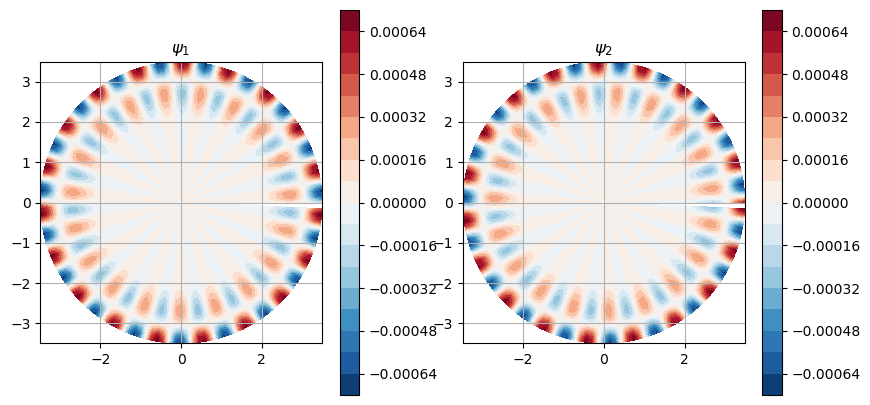

In [48]:
st = 0

prob_class = 'IVP'
r0 = 0
rt = None 

F = 51.8
x = r[:,r0:rt] * np.cos(phi)
y = r[:,r0:rt] * np.sin(phi)
# q1t = psi1[st,:,r0:rt]
# q2t = psi2[st,:,r0:rt]
# q1t = q1[st,:,r0:rt]
# q2t = q2[st,:,r0:rt]
q1t = u1[st,0,:,r0:rt]
q2t = u2[st,0,:,r0:rt]


fig, ax = plt.subplots(1,2, figsize=(10,5))

im = ax[0].contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax[0].set_aspect('equal')           # force square aspect
ax[0].set_adjustable('box')         # let the box resize
ax[0].set_title(r'$\psi_1$')
ax[0].grid()
plt.colorbar(im)

im = ax[1].contourf(x,y, q2t, levels=21, cmap='RdBu_r')
ax[1].set_aspect('equal')           # force square aspect
ax[1].set_adjustable('box')         # let the box resize
ax[1].set_title(r'$\psi_2$')
ax[1].grid()
plt.colorbar(im)

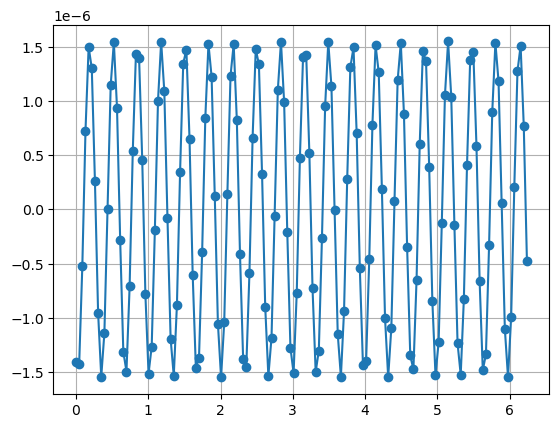

In [43]:
plt.plot(phi, tau1[10,:,0].flatten(),'o-')
plt.grid()

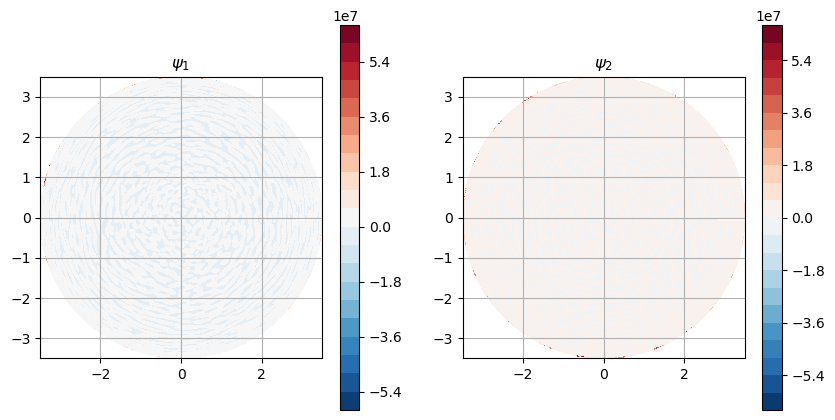

In [11]:
st = 1

prob_class = 'IVP'
r0 = 0
rt = None

x = r[:,r0:rt] * np.cos(phi)
y = r[:,r0:rt] * np.sin(phi)
q1t = psi1[st,:,r0:rt]
q2t = psi2[st,:,r0:rt]
q1t = q1[st,:,r0:rt]
q2t = q2[st,:,r0:rt]

fig, ax = plt.subplots(1,2, figsize=(10,5))

im = ax[0].contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax[0].set_aspect('equal')           # force square aspect
ax[0].set_adjustable('box')         # let the box resize
ax[0].set_title(r'$\psi_1$')
ax[0].grid()
plt.colorbar(im)

im = ax[1].contourf(x,y, q2t, levels=21, cmap='RdBu_r')
ax[1].set_aspect('equal')           # force square aspect
ax[1].set_adjustable('box')         # let the box resize
ax[1].set_title(r'$\psi_2$')
ax[1].grid()
plt.colorbar(im)

In [7]:
q1.shape 

(50, 144, 64)

/tmp/ipykernel_21795/1783436032.py:25: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in contour.collections:
/tmp/ipykernel_21795/1783436032.py:31: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  return contour.collections


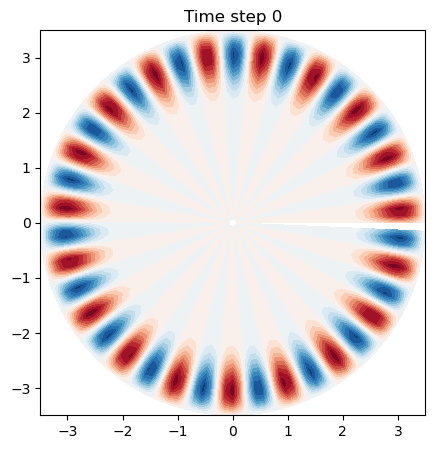

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

# Assume psi1.shape = (nt, ny, nx)
psi1 = psi1[:200,:,:]
nt = psi1.shape[0]

fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)
ax = fig.add_subplot(gs[0, 0])
ax.set_aspect('equal')
ax.set_adjustable('box')

# Initialize first frame
levels = 21
contour = ax.contourf(x, y, psi1[0], levels=levels, cmap='RdBu_r')
# cbar = fig.colorbar(contour, cax=fig.add_subplot(gs[0, 1]))

# Store current contour so we can remove it
def update(frame):
    global contour
    # Remove previous contour plots
    for c in contour.collections:
        c.remove()
    # Plot new frame
    contour = ax.contourf(x, y, psi1[frame], levels=levels, cmap='RdBu_r')
    # plt.colorbar(contour)
    ax.set_title(f'Time step {frame}')
    return contour.collections

ani = animation.FuncAnimation(fig, update, frames=nt, interval=100, blit=False)

from matplotlib.animation import PillowWriter
writer = PillowWriter(fps=10)
ani.save('psi1_reference.gif', writer=writer)

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1']
Task variables: ['constant', 'iteration', 'phi_hash_ddf03eeac03665c5f68d942d2ec28ea8c0f69d6f', 'r_hash_5c210d8c8572a4674588b83bb459d74d29dea731', 'sim_time', 'timestep', 'wall_time', 'write_number']
(101, 384, 64)


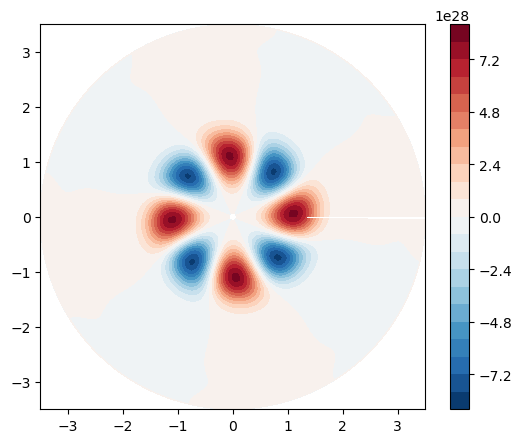

In [3]:
import h5py
F1 = 51.8
U = 100
s = 1
st = -1
snapshots_dir = f'/net/fs06/d0/linyao/GFD_Polar_vortex/ddloutput/'
snapshots_name = f'snapshots_F51_U_{U}_linear_noNu_2var'

snapshots_file = snapshots_dir + snapshots_name + '/' + snapshots_name

with h5py.File(f'{snapshots_file}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    # tau1 = f["tasks/tau1"][:]
    # psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

In [13]:
tau1.shape 

(10, 512, 1)

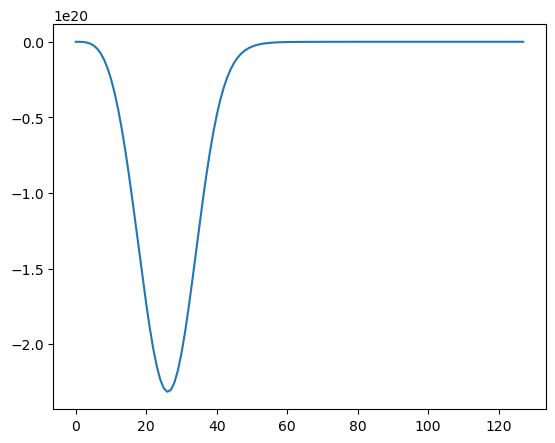

In [6]:
q1t = psi1[-1,0,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.plot(q1t)

plt.show()

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_df042c1481290cb836b7e3520bf4a1e1847fdc1e', 'r_hash_0828629f09e0130316c142ed92cb67db2201440d', 'sim_time', 'timestep', 'wall_time', 'write_number']
(8, 1024, 128)


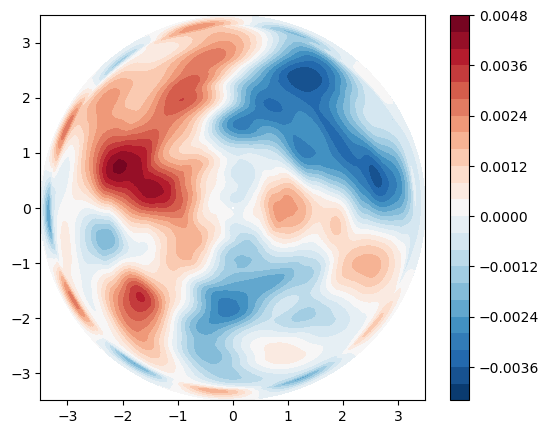

In [22]:
import h5py
F1 = 51.8
U = 10
s = 1
st = -1
snapshots_dir = f'/pscratch/sd/l/linyaoly/GFD_Polar_vortex/ddloutput/'
snapshorts_name = f'snapshots_F51_U_{U}_noNu_linear_4var_2tau_2taup'

with h5py.File(f'{snapshots_dir}{snapshorts_name}/{snapshorts_name}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    # psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

make initial values 1e-4 

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(500, 512, 64)


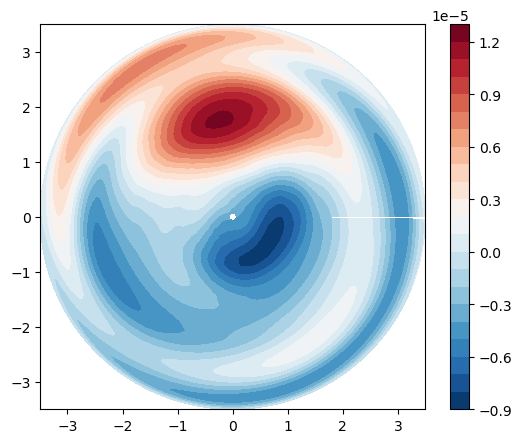

In [7]:
import h5py
F1 = 51.8
U = 100
s = 1
st = -1
snapshots_dir = f'snapshots_Fhigh_U_{U}_lapNu_nonlinear_4var_4tau_2taup'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    # psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(6, 512, 64)


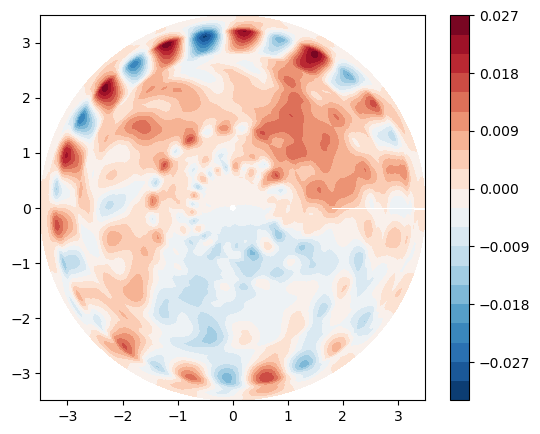

In [5]:
import h5py
F1 = 51.8
U = 100
s = 1
st = 3
snapshots_dir = f'snapshots_F51_U_{U}_lapNu_nonlinear_4var_4tau_2taup'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    # psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

make nu = 0 

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(345, 512, 64)


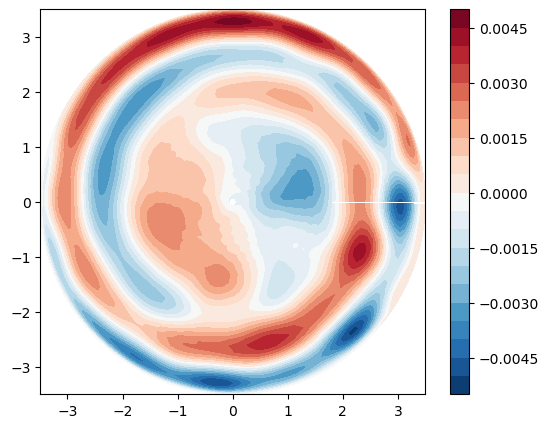

In [9]:
import h5py
F1 = 51.8
U = 100
s = 2
st = 326
snapshots_dir = f'snapshots_Fhigh_U_{U}_lapNu_nonlinear_4var_4tau_2taup'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    # psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

[psi1, psi2, q1, q2, u1, u2] f'snapshots_Fhigh_U_{U}_lapNu_nonlinear_6var_4tau_2taup'

Below BC makes cond smaller. 
```
problem.add_equation("psi1(r=a_norm) = 0") # 7 is a/L
problem.add_equation("psi2(r=a_norm) = 0")
problem.add_equation("q1(r=a_norm) = 0") # 7 is a/L
problem.add_equation("q2(r=a_norm) = 0")
problem.add_equation("integ(psi1) = 0")
```

dt should be 1e-4 or smaller

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(63, 512, 64)


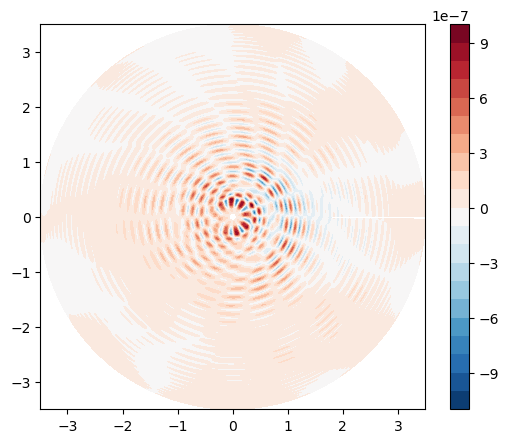

In [ ]:
import h5py
F1 = 51.8
U = 100
s = 2
st = 10
snapshots_dir = f'snapshots_Fhigh_U_{U}_lapNu_nonlinear_6var_4tau_2taup'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

[psi1, psi2, 4xtau, 2xtaup]; hyper viscosity; high cond

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(37, 512, 64)


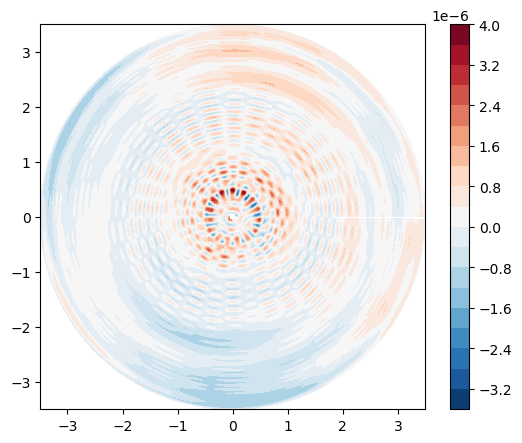

In [9]:
import h5py
F1 = 51.8
U = 100
s = 1
st = 20
snapshots_dir = f'snapshots_Fhigh_U_{U}_lapNu_nonlinear_2var_4tau_2taup'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[st,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

### IVP_dry_2L_v9_highF_lapNu_r3.5_4tau_linear.py 
```
timestep =1e-4
problem.add_equation("dt(lap(psi1) - F1 * (psi1 - psi2)) " \
                        "+ (psi2u(psi1)) @ grad(Q1) " \
                        "+ psi2u(psi1_0) @ grad(lap(psi1) - F1 * (psi1 - psi2))" \
                        "- nu * lap(lap(psi1) - F1 * (psi1 - psi2))" \
                        "+ lift(tau_psi1,-1) + lift(tau_psi2,-2)= 0")
problem.add_equation("dt(lap(psi2) + F2 * (psi1 - psi2)) " \
                        "+ (psi2u(psi2)) @ grad(Q2) " \
                        "+ psi2u(psi2_0) @ grad(lap(psi2) + F2 * (psi1 - psi2))" \
                        "- nu * lap(lap(psi2) + F2 * (psi1 - psi2))" \
                        "+ lift(tau_psi3, -1) + lift(tau_psi4,-2)= 0")
problem.add_equation("psi1(r=a_norm) = 0") # 7 is a/L
problem.add_equation("psi2(r=a_norm) = 0")
problem.add_equation("(lap(psi1) - F1 * (psi1 - psi2))(r=a_norm) = 0") # 7 is a/L
problem.add_equation("(lap(psi2) + F2 * (psi1 - psi2))(r=a_norm) = 0")
```

Note: 
1. change lift from -2 to -1: RuntimeError: Factor is exactly singular
2. Below does not work. 
```
problem.add_equation("(psi1 - psi2)(r=a_norm) = 0"); problem.add_equation("psi1(r=a_norm) = 0")
```
3. Change resolution does not work. 


Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_df042c1481290cb836b7e3520bf4a1e1847fdc1e', 'r_hash_0828629f09e0130316c142ed92cb67db2201440d', 'sim_time', 'timestep', 'wall_time', 'write_number']
(25, 1024, 128)


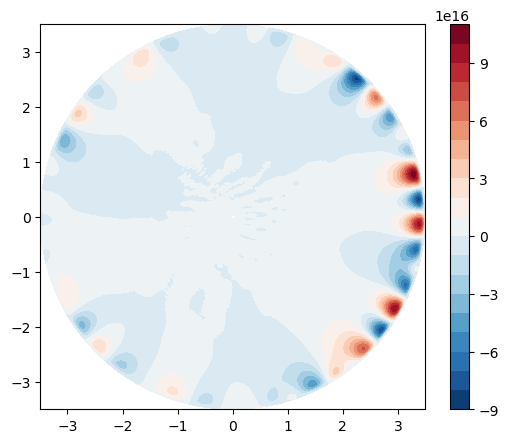

In [9]:
import h5py
F1 = 51.8
U = 100
s = 1
snapshots_dir = f'snapshots_Fhigh_U_{U}_2tau_linearRHS_lapNu'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[15,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

### IVP_dry_2L_v1_highF_noNu_r3.5_q_taup.py
Note:
1. Below: RuntimeError: Factor is exactly singular
```
problem.add_equation("q1 - (lap(psi1) - F1 * (psi1 - psi2)) + lift(tau1,-1) + tau_p1 = 0")
problem.add_equation("q2 - (lap(psi2) + F2 * (psi1 - psi2)) + lift(tau2,-1) + tau_p2 = 0")
problem.add_equation("dt(q1) " \
                        "+ (psi2u(psi1)) @ grad(Q1) " \
                        "+ psi2u(psi1_0) @ grad(q1 + lift(tau1,-1))" \
                        "= " \
                        "- psi2u(psi1) @ grad(q1 + lift(tau1,-1))")
problem.add_equation("dt(q2) " \
                        "+ (psi2u(psi2)) @ grad(Q2) " \
                        "+ psi2u(psi2_0) @ grad(q2 + lift(tau2,-1))" \
                        "= " \
                        "- psi2u(psi2) @ grad(q2 + lift(tau2,-1))")
problem.add_equation("q1(r=a_norm) = 0") # 7 is a/L
problem.add_equation("q2(r=a_norm) = 0")
problem.add_equation("integ(psi1) = 0")
problem.add_equation("integ(psi2) = 0")
```

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_5c210d8c8572a4674588b83bb459d74d29dea731', 'sim_time', 'timestep', 'wall_time', 'write_number']
(66, 512, 64)


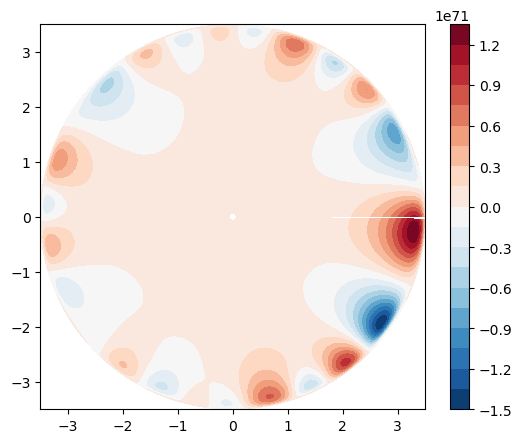

In [3]:
import h5py
F1 = 51.8
U = 100
s = 1
snapshots_dir = f'snapshots_Fhigh_U_{U}_2tau_linearRHS'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[50,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2', 'q1', 'q2']
Task variables: ['constant', 'iteration', 'phi_hash_7b8ec7cabc40ac4b596a5ef833e9eab019f07d46', 'r_hash_a72ad756b51a28d6da4ad5b595eae9ca9e6a56ea', 'sim_time', 'timestep', 'wall_time', 'write_number']
(100, 512, 64)


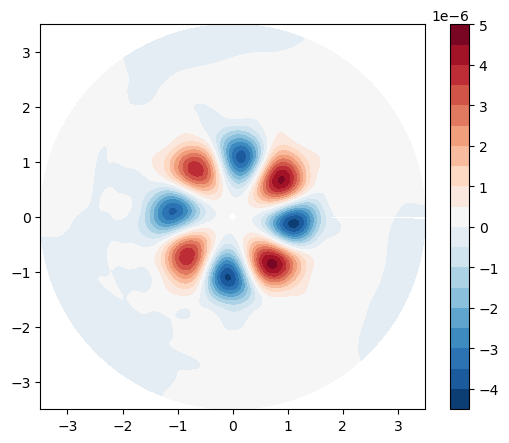

In [8]:
import h5py
F1 = 51.8
U = 100
s = 2
snapshots_dir = f'snapshots_Fhigh_U_{U}_4tau_lapNu_lapqBC_q'

with h5py.File(f'/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/{snapshots_dir}/{snapshots_dir}_s{s}.h5', "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    # q1 = f["tasks/q1"][:]
    # q2 = f["tasks/q2"][:]
    dset = f['tasks']['psi1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)

q1t = psi1[0,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

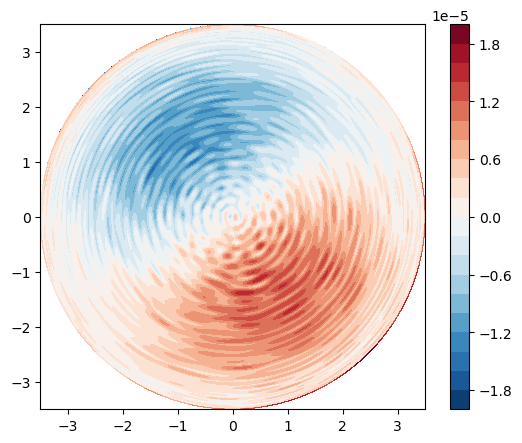

In [16]:
q1t = q1[-1,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

## Plot of steamfunction and potential vorticity in high F

In [19]:
import h5py

with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_51.8_500/snapshots_s4.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_5.18_100/snapshots_s4.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots/snapshots_s4.h5", "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    q1 = f["tasks/q1"][:]
    q2 = f["tasks/q2"][:]
    dset = f['tasks']['q1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))

x = r * np.cos(phi)
y = r * np.sin(phi)


Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2', 'q1', 'q2']
Task variables: ['constant', 'iteration', 'phi_hash_df042c1481290cb836b7e3520bf4a1e1847fdc1e', 'r_hash_596c2e98b89afac4b9ab58f57307e6fe96acff93', 'sim_time', 'timestep', 'wall_time', 'write_number']
(100, 1024, 256)


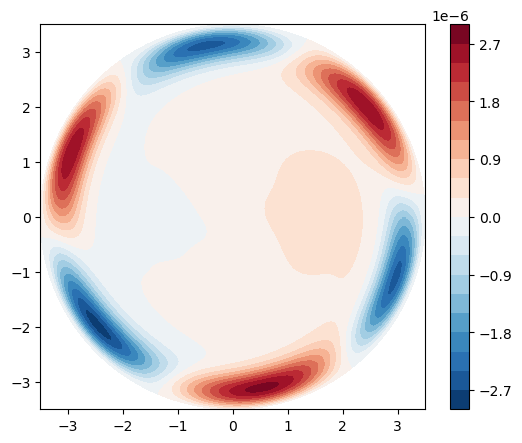

In [22]:
q1t = psi1[6,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

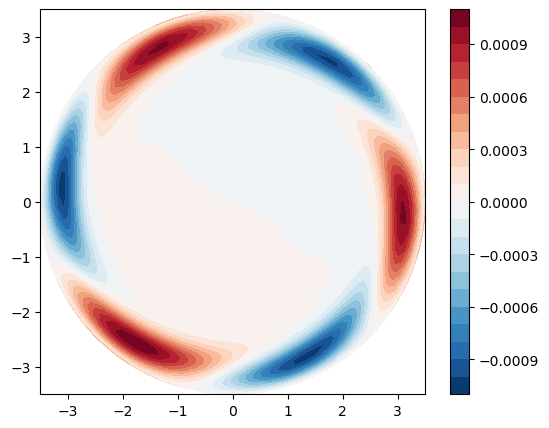

In [23]:
q1t = q1[-1,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)

## Growth rate in Low F

In [19]:
import h5py
import glob 
import os 

# h5files 

# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_51.8_500/snapshots_s4.h5", "r") as f:
with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots_5.18_100/snapshots_s3.h5", "r") as f:
# with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots/snapshots_s4.h5", "r") as f:
    # psi1_list = []
    # for file in h5_files:
    #     with h5py.File(file, 'r') as f:
    #         psi1_list.append(f['tasks']['psi1'][...])
    # psi1_all = np.concatenate(psi1_list, axis=0)  # stac

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    q1 = f["tasks/q1"][:]
    q2 = f["tasks/q2"][:]
    dset = f['tasks']['q1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))
    # t = f['tasks/iteration'][:]

x = r * np.cos(phi)
y = r * np.sin(phi)


(100, 1024, 256)


In [20]:
t = np.linspace(1e-3,0.1,100)

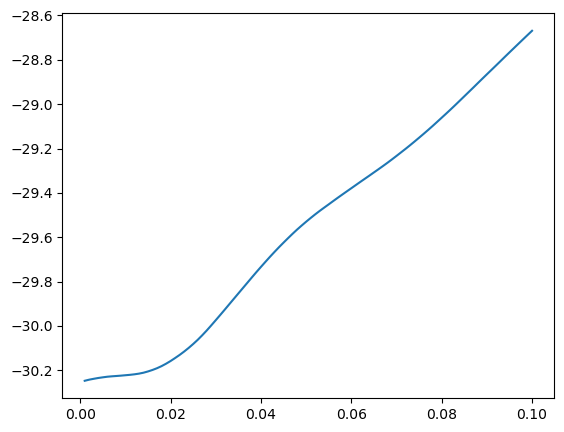

In [21]:
psi1_xy2 = (psi1[:, 256, 128])**2
log_psi1_xy2 = np.log(psi1_xy2)

fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.plot(t, log_psi1_xy2)

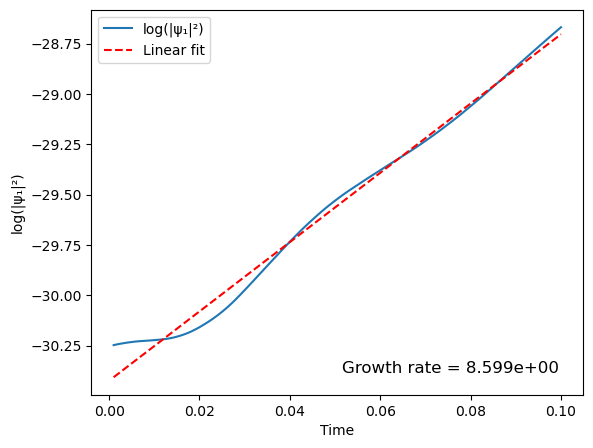

In [22]:
from scipy.stats import linregress

# Linear regression: log_psi1_xy2 = a * t + b
slope, intercept, r_value, p_value, std_err = linregress(t, log_psi1_xy2)

# Growth rate is half of slope
growth_rate = slope / 2

# Plot
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

ax = fig.add_subplot(gs[0, 0])
ax.plot(t, log_psi1_xy2, label='log(|ψ₁|²)')
ax.plot(t, slope * t + intercept, 'r--', label='Linear fit')
ax.set_xlabel('Time')
ax.set_ylabel('log(|ψ₁|²)')
ax.legend()

# Annotate growth rate
ax.text(
    0.95, 0.05,
    fr'Growth rate = {growth_rate:.3e}',
    ha='right', va='bottom',
    transform=ax.transAxes,
    fontsize=12
)

plt.show()